In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('poster')
sns.set_style("whitegrid")

In [9]:
import math

# function to print series of n elements that has specified mean and standard deviation d
def series(n, mean, d): 
    ret_lst = []
    # if S.D. is 0 then print all 
    # elements as 0. 
    if d == 0: 
        # print n 0's 
        for i in range(n): 
            ret_lst.append(0)
#             print("0", end = ' ') 
        return 1
          
    # if S.D. is even 
    if n % 2 == 0: 
        # print -SD, +SD, -SD, +SD 
        i = 1
        while i <= n: 
            ret_lst.append((math.pow(-1, i) * d))
#             print("%.5f"%((math.pow(-1, i) * d)), 
#                   end =' ') 
            i += 1
    else: 
        # if odd 
        # convert n to a float integer 
        m = n 
        r = (m / (m - 1)) 
        g = (float)(d * float(math.sqrt(r))) 
          
        # print one element to be 0 
        ret_lst.append(0)
#         print("0 ", end = ' ') 
          
        # print (n-1) elements as xi derived 
        # from the formula 
        i = 1
        while i < n: 
            ret_lst.append(math.pow(-1, i) * g)
#             print("%.5f"%(math.pow(-1, i) * g), 
#                   end = ' ') 
            i = i + 1
#     print("\n") 
    return [i + mean for i in ret_lst]

In [10]:
# azure_data = [
#     (5511, "Trusted (SSM)"),
#     (3357, "Trusted (SSM)"),
#     (3897, "Trusted (SSM)"),
#     (3513, "Trusted (SSM)"),
#     (3970, "Trusted (SSM)"),
#     (6288, "Untrusted (SSM)"),
#     (3524, "Untrusted (SSM)"),
#     (4010, "Untrusted (SSM)"),
#     (4631, "Untrusted (SSM)"),
#     (4361, "Untrusted (SSM)"),
#     (474, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (226, "Untrusted (USM)"),
#     (62, "Untrusted (USM)"),
#     (375, "Untrusted (USM)")
# ]
azure_data = [
    [(i, "Civitas", "PSec") for i in series(10, 8913.4, 593.9451489826313)],
    [(i, "Civitas", "P") for i in series(10, 2597.1, 782.0327934300453)],
    [(i, "OTP", "PSec") for i in series(10, 7962.6, 736.5370594885229)],
    [(i, "OTP", "P") for i in series(10, 285.0, 172.02034763364477)]
]

azure_data = [item for sublist in azure_data for item in sublist]


azureDf = pd.DataFrame(azure_data, columns = ['Time [ms]' , 'Example Type', 'Language']) 
# print(azureDf)

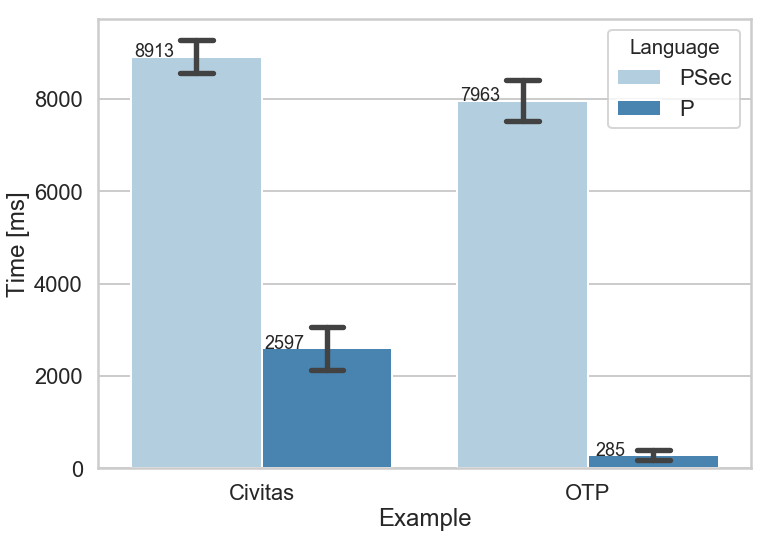

In [11]:

# # zoom-in / limit the view to different portions of the data
# ax.set_ylim(3250, 6000)  # outliers only
# ax2.set_ylim(0, 650)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.get_xaxis().set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1.05 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1.05 + d), **kwargs)  # bottom-right diagonal

g = sns.barplot(x = 'Example Type', y = 'Time [ms]', hue = "Language", data = azureDf,
            palette = 'Blues', edgecolor = 'w', capsize=0.1)
# sns.barplot(x = 'Create Type', y = 'Time [ms]', data = azureDf,
#             palette = 'Blues', edgecolor = 'w', capsize=0.1, ax=ax2)
# ax2.set_ylabel('') 
# ax2.tick_params(axis='x', labelsize=20)
# ax.yaxis.set_label_coords(-.11,0.3)
ax = plt.gca()
ax.set_xlabel('Example') 
# plt.ylim(0, 5500)
# plt.yticks(np.arange(0, 5501, 500))

# for index, row in groupedvalues.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2 - 0.13
            _y = p.get_y() + p.get_height() + 0.1
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=18) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)


plt.savefig('PSecApplicationLevelMetrics.png',dpi=500)
# plt.show()
